# Tessutils to extract light curves from full frame images of the TESS mission

## To consider

1. This tutorial has been tested with TESS stars in the southern continous viewing zone. Nevertheless, it should hold for any TESS star. Please open an issue in the GitHub repository if any problem arises.

2. Feel free to contribute to this tutorial and add any section you deem relevant or useful.

## Practicalities

### Make `Tessutils` importable in current shell sesion

We assume that you are running this tutorial from the original directory in `tessutils`. To allowing you to import `tessutils` as if it was installed in your Python environment, we will add the parent directory of `tessutils` to the `sys.path`.

In [1]:
import sys
import os

# Add the parent directory of the `tessutils` package to the sys.path.
# This assumes that the notebook is in the `tutorial` subdirectory within `tessutils`.
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

if module_path not in sys.path:
    sys.path.append(module_path)

We can now import `Tessutils` as, for instance

In [2]:
import tessutils as tu

### Make `tessutils` importable from everywhere

You can import `tessutils` like any other Python module after you install it with `pip`. For that, go to the directory containing the `setup.py` file and run:

```pip install .```

If you wish so, you can later uninstall it with:


```pip uninstall tessutils```

### Enable interactive plots within this notebook

To enable interactive plots here, run the (so-called) magic command below. **Remember to exit interactive plots by pressing `q`.**

In [3]:
%matplotlib widget

### Core functions in Tessutils

There are 3 main functions you will use:

1. `tu.reduction.download_tpf`: Downloads Target Pixel Frames (TPFs) from the TESS Full Frame Images.
2. `tu.reduction.extract_light_curve`: Extracts the light curve from the TPF and save it as a pickle file.
3. `tu.plots.plot_diagnosis`: Provides with diagnostic plots in PDF format.

When working with multple TESS sectors, you will also use the following gruoping functions:

1. `tu.reduction.group_lcs`: Group all pickle files with the same TIC number (but different sector number) generated by `tu.reduction.extract_light_curve` into a single pickle file. 
2. `tu.reduction.stitch_group`: Stitch the light curves inside the pickle file generated by `tu.reduction.group_lcs` and output it as a CSV file.

When working with a large catalog, you may want use the following function to create a table characterizing the light curve extraction of each star:

1. `tu.reduction.get_group_summary`: Generte a CSV table from the output of `tu.reduction.group_lcsoup_lcs` with information characterizing the light curve extraction for each TPF processed.

You can check the description and options of all functions in the module as in the example below

In [ ]:
print('\n>----------------------------------------------------------------------<\n')
help(tu.reduction.download_tpf)
print('\n>----------------------------------------------------------------------<\n')
help(tu.reduction.extract_light_curve)
print('\n>----------------------------------------------------------------------<\n')
help(tu.plots.plot_diagnosis)
print('\n>----------------------------------------------------------------------<\n')
help(tu.reduction.group_lcs)
print('\n>----------------------------------------------------------------------<\n')
help(tu.reduction.stitch_group)
print('\n>----------------------------------------------------------------------<\n')
help(tu.reduction.get_group_summary)
print('\n>----------------------------------------------------------------------<\n')

### Get one light curve from a TIC star from a single TESS sector 

Define target

In [4]:
TIC = 374944608 # It can be a list of TIC numbers too
sector = 7 # It can be a list of sector numbers too

**First**, download the corresponding TESS cut images from MAST.

Cut images are also called Target Pixel Files (TPFs). Below is a definition provided by the `lightkurve` package.

>Target Pixel Files (TPFs) are a file common to Kepler/K2 and the TESS mission. They contain movies of the pixel data centered on a single target star.
>
>TPFs can be thought of as stacks of images, with one image for every timestamp the telescope took data. Each timestamp is referred to as a cadence. These images are cut out ‘postage stamps’ of the full observation to make them easier to work with.
>
>Source: [lightkurve package](https://docs.lightkurve.org/tutorials/1-getting-started/what-are-targetpixelfile-objects.html#What-are-TargetPixelFile-objects?Cut)

In [5]:
tu.reduction.download_tpf(TIC, sectors=sector, outputdir='./tpfs_sec7')

Saved: tpfs_sec7/tic374944608_sec7.fits


the TPF has been downloaded to a folder named `tpfs_sec7` as FITS files.

**Second**, we extract the light curve from the TPF

In [6]:
TPF_file = f'tpfs_sec7/tic{TIC}_sec{sector}.fits' # Path to the TPF file just downloaded
tu.reduction.extract_light_curve(TPF_file, outputdir='processed_sec7')

'TIC 374944608 Sector 7: OK'

The function will return feedback as a message.

- **If the message says "OK"**, it means that the light curve extraction found no problems.

- **If the message is not "OK"**, it means that the light curve extraction found a problem and the message attempts to describe what it was or where it happended. Further information can be obtained by creating a diagnostic plot.

The reduced light curve, along with information on the extraction process, is **stored as a pickle file** in a folder called `processed_sec7` and can be accessed as follows

In [7]:
import pickle
picklefile = f'processed_sec7/tic{TIC}_sec{sector}_corrected.pickle'
with open(picklefile, 'rb') as file:
    info = pickle.load(file)

Once results are loaded, the reduced light curve, with systematics and outliers already removed, is a `lightkurve.lightcurve.TessLightCurve` object (from the module [lightkurve](https://docs.lightkurve.org/reference/lightcurve.htmlhttps://docs.lightkurve.org/reference/lightcurve.html)) and can be accessed as follows

In [8]:
lc = info.lc_regressed_clean

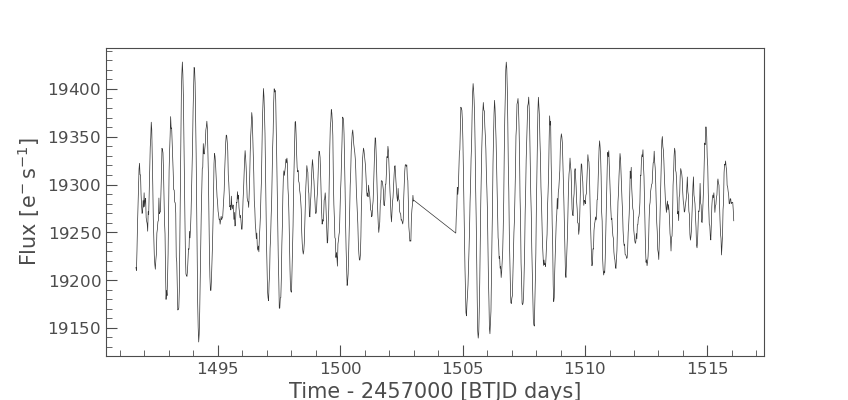

In [9]:
_ = lc.plot()

**Last**, we create a PDF file with diagnostic plots of the relevant processes involved during the light curve extraction.

In [11]:
processed_file = f'processed_sec7/tic{TIC}_sec{sector}_corrected.pickle'
pdfname=f'diagnostic_plot_TIC{TIC}_sec{sector}.pdf'
tu.plots.plot_diagnosis(processed_file, pdfname=pdfname)

Reading: tic374944608_sec7_corrected.pickle
Ploting TIC 374944608, sector 7.
Generating plot of stitched light curve and periodogram.
Saving PDF as diagnostic_plot_TIC374944608_sec7.pdf.


**Information about the different panels** shown in the PDF can be found in the [reference paper](https://doi.org/10.1051/0004-6361/202141926):

* https://doi.org/10.1051/0004-6361/202141926


### Get a light curve from a TIC star from several available TESS sectors 

Define target

In [12]:
TIC = 374944608 # It can be a list of TIC numbers too
sector = [ 1,2,3,4,5,6,7,8,9,10,11,12,13 ]

**First**, download the corresponding Target Pixel File (TPF)

In [13]:
tu.reduction.download_tpf(TIC, sectors=sector, outputdir='./tpfs_yr1')

Saved: tpfs_yr1/tic374944608_sec1.fits
Saved: tpfs_yr1/tic374944608_sec2.fits
Saved: tpfs_yr1/tic374944608_sec3.fits
Saved: tpfs_yr1/tic374944608_sec4.fits
Saved: tpfs_yr1/tic374944608_sec5.fits
Saved: tpfs_yr1/tic374944608_sec6.fits
Saved: tpfs_yr1/tic374944608_sec7.fits
Saved: tpfs_yr1/tic374944608_sec8.fits
Saved: tpfs_yr1/tic374944608_sec9.fits
Saved: tpfs_yr1/tic374944608_sec10.fits
Saved: tpfs_yr1/tic374944608_sec11.fits
Saved: tpfs_yr1/tic374944608_sec12.fits
Saved: tpfs_yr1/tic374944608_sec13.fits


the TPFs have been downloaded to a folder named `tpfs_yr1`.

**Second**, we extract the light curve from the the list of TPFs

In [14]:
from pathlib import Path
TPF_files = [str(file) for sec in sector for file in Path('tpfs_yr1').glob(f'tic{TIC}_sec{sec}.fits')]
tu.reduction.extract_light_curve(TPF_files, outputdir='processed_yr1')

TIC 374944608 Sector 1: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, for further information see arguments `max_num_of_pc`, `num_of_pc_bins`, `pc_threshold_variance`.
TIC 374944608 Sector 4: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, for further information see arguments `max_num_of_pc`, `num_of_pc_bins`, `pc_threshold_variance`.
TIC 374944608 Sector 8: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, for further information see arguments `max_num_of_pc`, `num_of_pc_bins`, `pc_threshold_variance`.


each processed sector has been stored in the folder `processed_yr1`.

**Third**, we combine all pickle files with the same TIC number into a single pickle file using the code below

In [15]:
inputdir='processed_yr1'
tu.reduction.group_lcs(inputdir,TICs=TIC,sectors=sector,outputdir='groupped_yr1')

the groupped pickle file has been stored in the folder `groupped_yr1`.

If there are pickle files corresponding to different TIC numbers inside `inputdir`, **the function will automatically group them separately** based on their file names if the kwarg `TICs`is ommited.

**Fourth**, we stitch up the content of the group files using the code below, which returns a normalized light curve in ppt units inside the folder `stitched_yr1`.

If the optional argument `TICs` is ommited, the function will **apply on all files with different TIC number separately** (i.e., it will return a CSV file with the stitched light curve for every TIC group). 

In [16]:
inputdir='groupped_yr1'
tu.reduction.stitch_group(inputdir,TICs=TIC, outputdir='stitched_yr1')

Let us read and plot the corrected light curve.

In [17]:
import lightkurve as lk
import pandas as pd
lc = pd.read_csv(f'stitched_yr1/lc_tic{TIC}_corrected_stitched.csv')
lc = lk.LightCurve(time=lc.time, flux=lc.flux)

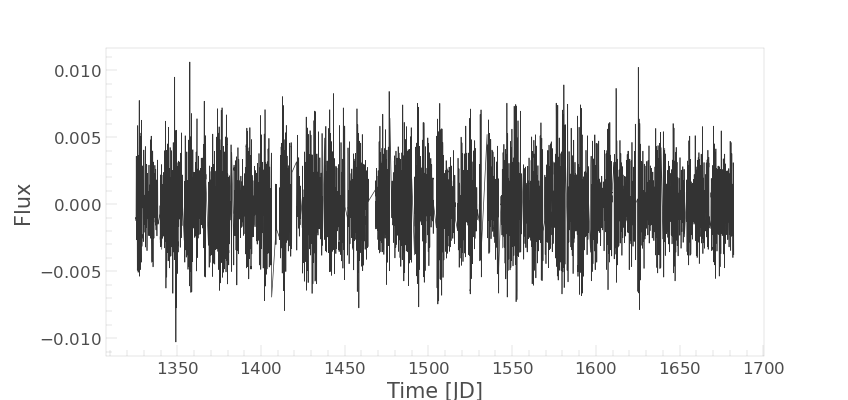

In [18]:
_ = lc.plot()

**Last**, we create a PDF file with diagnostic plots of the relevant processes involved during the light curve extraction for all sectors. For this, we use as input the pickle file containing the group of all sectors for a single TIC.

In [19]:
group_file = f'groupped_yr1/tic{TIC}_allsectors_corrected.pickle'
pdfname=f'diagnostic_plot_TIC{TIC}_yr1.pdf'
tu.plots.plot_diagnosis(group_file, pdfname=pdfname)
print('Done.')

Reading: tic374944608_allsectors_corrected.pickle
Ploting TIC 374944608, sector 1.
Ploting TIC 374944608, sector 2.
Ploting TIC 374944608, sector 3.
Ploting TIC 374944608, sector 4.
Ploting TIC 374944608, sector 5.
Ploting TIC 374944608, sector 6.
Ploting TIC 374944608, sector 7.
Ploting TIC 374944608, sector 8.
Ploting TIC 374944608, sector 9.
Ploting TIC 374944608, sector 10.
Ploting TIC 374944608, sector 11.
Ploting TIC 374944608, sector 12.
Ploting TIC 374944608, sector 13.
Generating plot of stitched light curve and periodogram.
Saving PDF as diagnostic_plot_TIC374944608_yr1.pdf.
Done.


Some of the individual panels in the PDF above are **reproduced later in this tutorial**. Further information about the different panels shown in the PDF can be found in the [reference paper](https://doi.org/10.1051/0004-6361/202141926):

* https://doi.org/10.1051/0004-6361/202141926


### Get a light curve from a TIC star from all available TESS sectors 

Define target

In [20]:
TIC = 374944608 # It can be a list of TIC numbers too

**First**, download the corresponding Target Pixel File (TPF)

In [21]:
tu.reduction.download_tpf(TIC)

Saved: tpfs/tic374944608_sec1.fits
Saved: tpfs/tic374944608_sec2.fits
Saved: tpfs/tic374944608_sec3.fits
Saved: tpfs/tic374944608_sec4.fits
Saved: tpfs/tic374944608_sec5.fits
Saved: tpfs/tic374944608_sec6.fits
Saved: tpfs/tic374944608_sec7.fits
Saved: tpfs/tic374944608_sec8.fits
Saved: tpfs/tic374944608_sec9.fits
Saved: tpfs/tic374944608_sec10.fits
Saved: tpfs/tic374944608_sec11.fits
Saved: tpfs/tic374944608_sec12.fits
Saved: tpfs/tic374944608_sec13.fits
Saved: tpfs/tic374944608_sec27.fits
Saved: tpfs/tic374944608_sec28.fits
Saved: tpfs/tic374944608_sec29.fits
Saved: tpfs/tic374944608_sec30.fits
Saved: tpfs/tic374944608_sec31.fits
Saved: tpfs/tic374944608_sec32.fits
Saved: tpfs/tic374944608_sec33.fits
Saved: tpfs/tic374944608_sec34.fits
Saved: tpfs/tic374944608_sec35.fits
Saved: tpfs/tic374944608_sec36.fits
Saved: tpfs/tic374944608_sec37.fits
Saved: tpfs/tic374944608_sec38.fits
Saved: tpfs/tic374944608_sec39.fits
Saved: tpfs/tic374944608_sec61.fits
Saved: tpfs/tic374944608_sec62.fits
S

the TPFs have been downloaded to a folder named `tpfs`.

**Second**, we extract the light curve from the the list of TPFs

In [22]:
from pathlib import Path
TPF_files = [str(file) for file in Path('tpfs').glob(f'tic{TIC}_sec*.fits')]
tu.reduction.extract_light_curve(TPF_files, progressbar=True)

TIC 374944608 Sector 67: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, for further information see arguments `max_num_of_pc`, `num_of_pc_bins`, `pc_threshold_variance`.
TIC 374944608 Sector 66: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, for further information see arguments `max_num_of_pc`, `num_of_pc_bins`, `pc_threshold_variance`.
TIC 374944608 Sector 36: Skipped: Not aperture found.
TIC 374944608 Sector 61: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, for further information see arguments `max_num_of_pc`, `num_of_pc_bins`, `pc_threshold_variance`.
TIC 374944608 Sector 8: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, for further information see arguments `max_num_of_pc`, `num_of_pc_bins`, `pc_threshold_variance`.
TIC 374944608 Sector 4: No principal components (PCs) with variance>0.0001. All 7 PCs used (this is just FYI, f

each processed sector has been stored in the default folder `processed`.

**Third**, we combine all pickle files with the same TIC number into a single pickle file using the code below

In [23]:
inputdir='processed'
tu.reduction.group_lcs(inputdir,TICs=TIC)

the groupped pickle file has been stored in the default folder `groupped`.

If there are pickle files corresponding to different TIC numbers inside `inputdir`, **the function will automatically group them separately** based on their file names if the kwarg `TICs`is ommited.

**Fourth**, we stitch up the content of the group files using the code below, which returns a normalized light curve in ppt units inside the default folder `stitched`.

If the optional argument `TICs` is ommited, the function will **apply on all files with different TIC number separately** (i.e., it will return a CSV file with the stitched light curve for every TIC group). 

In [24]:
inputdir='groupped'
tu.reduction.stitch_group(inputdir,TICs=TIC)

Let us read and plot the corrected light curve.

In [25]:
import lightkurve as lk
import pandas as pd
lc = pd.read_csv(f'stitched/lc_tic{TIC}_corrected_stitched.csv')
lc = lk.LightCurve(time=lc.time, flux=lc.flux)

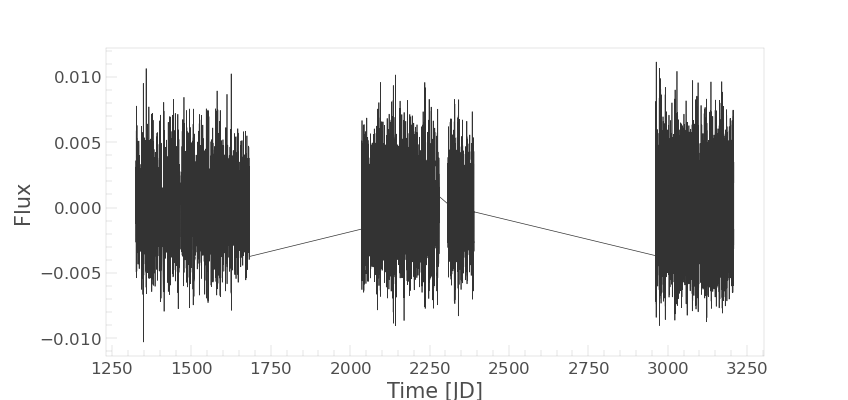

In [26]:
_ = lc.plot()

**Last**, we create a PDF file with diagnostic plots of the relevant processes involved during the light curve extraction for all sectors. For this, we use as input the pickle file containing the group of all sectors for a single TIC.

In [27]:
group_file = f'groupped/tic{TIC}_allsectors_corrected.pickle'
tu.plots.plot_diagnosis(group_file)
print('Done.')

Reading: tic374944608_allsectors_corrected.pickle
Ploting TIC 374944608, sector 1.
Ploting TIC 374944608, sector 2.
Ploting TIC 374944608, sector 3.
Ploting TIC 374944608, sector 4.
Ploting TIC 374944608, sector 5.
Ploting TIC 374944608, sector 6.
Ploting TIC 374944608, sector 7.
Ploting TIC 374944608, sector 8.
Ploting TIC 374944608, sector 9.
Ploting TIC 374944608, sector 10.
Ploting TIC 374944608, sector 11.
Ploting TIC 374944608, sector 12.
Ploting TIC 374944608, sector 13.
Ploting TIC 374944608, sector 27.
Ploting TIC 374944608, sector 28.
Ploting TIC 374944608, sector 29.
Ploting TIC 374944608, sector 30.
Ploting TIC 374944608, sector 31.
Ploting TIC 374944608, sector 32.
Ploting TIC 374944608, sector 33.
Ploting TIC 374944608, sector 34.
Ploting TIC 374944608, sector 35.
Ploting TIC 374944608, sector 36.
Ploting TIC 374944608, sector 37.


/Users/stefano/Documents/repos/tessutils/tessutils/plots.py:320: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image), origin='lower', cmap = plt.cm.YlGnBu_r)
/Users/stefano/Documents/repos/tessutils/tessutils/plots.py:347: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image), origin='lower', cmap = plt.cm.YlGnBu_r)


Ploting TIC 374944608, sector 38.
Ploting TIC 374944608, sector 39.
Ploting TIC 374944608, sector 61.
Ploting TIC 374944608, sector 62.
Ploting TIC 374944608, sector 63.
Ploting TIC 374944608, sector 64.
Ploting TIC 374944608, sector 65.
Ploting TIC 374944608, sector 66.
Ploting TIC 374944608, sector 67.
Ploting TIC 374944608, sector 68.
Ploting TIC 374944608, sector 69.
Generating plot of stitched light curve and periodogram.
Saving PDF as diagnostic_plot_TIC374944608.pdf.
Done.


Some of the individual panels in the PDF above are **reproduced later in this tutorial**. Further information about the different panels shown in the PDF can be found in the [reference paper](https://doi.org/10.1051/0004-6361/202141926):

* https://doi.org/10.1051/0004-6361/202141926


## Technicalities

### Access additional information on the extraction process

Besides the corrected light curve, the pickle file generated by `tu.reduction.extract_light_curve` contains a **SimpleNamespace** object with the attributes listed below. If there is a problem during the light curve extraction (or not need for some of the attributes), they will be set to `None` or `numpy.nan`.

**The information below is also available in the documentaion for `tu.reduction.extract_light_curve`.**

```
1. tic:     (int)
   TIC number.
2. sector:  (int)
   TESS sector number.
3. ra:      (float)
   Right ascension.
4. dec:     (float)
   Declination.
5. headers: (list)
   List with all headers in the original TPF.
   
6. fit: (types.SimpleNamespace)
   Information regarding the fit of 2D Gaussians reproducing the TPF's median cadence image.
|--- 6.1. fitted_image:               (numpy.ndarray)
|         TPF's median cadence image.
|--- 6.2. Plane:                      (astropy.modeling.functional_models.Planar2D)
|         Fitted model (2D plane) of the background signal of the `fitted_image`. 
|--- 6.3. TargetStar:                 (astropy.modeling.functional_models.Gaussian2D)
|         Fitted model (2D Gaussian) of the target star in the `fitted_image`. 
|--- 6.4. Neighbours:                 (astropy.modeling.core.CompoundModel)
|         Fitted model (set of 2D Gaussians) of the neighbouring stars in the `fitted_image`. 
|--- 6.5. xPixel:                     (numpy.ndarra>)
|         Domain of `fitted_image` expresed as pixel coordinates. Generated by `numpy.mgrid` function. X-like coordinates.
|--- 6.6. yPixel:                     (numpy.ndarra>)
|         Domain of `fitted_image` expresed as pixel coordinates. Generated by `numpy.mgrid` function. Y-like coordinates.
|--- 6.7. neighbour_flux_ap:          (numpy.float64)
|         Flux contribution of neighboring stars to the aperture mask.
|--- 6.8. target_flux_ap:             (numpy.float64)
|         Flux contribution of target star to the aperture mask.
|--- 6.9. bkg_flux_ap:                (numpy.float64)
|         Flux contribution of background to the aperture mask.
|--- 6.10. fraction_contamination_ap: (numpy.float64)
|          Flux ratio of the aperture mask from neighbouring stars and the target star. I.e., `neighbour_flux/target_flux `.
|--- 6.11. fraction_bkg_change:       (numpy.float64)
|          Flux ratio of the background maximun change and average background.

7. neighbours_all: (types.SimpleNamespace)
   Information regarding all found neighbouring stars.
|--- 7.1. mag: (numpy.ndarray)
|         TESS magnitude.
|--- 7.2. ra:  (numpy.ndarray)
|         Right ascension.
|--- 7.3. dec: (numpy.ndarray)
|         Declination.

8. neighbours_used: (types.SimpleNamespace)
   Information regarding only neighbouring stars used during the fit.
|--- 8.1. mag: (numpy.ndarray)
|         TESS magnitude.
|--- 8.2. ra:  (numpy.ndarray)
|         Right ascension.
|--- 8.3. dec: (numpy.ndarray)
|         Declination.
|--- 8.4. pix: (numpy.ndarray)
|         Pixel coordinates.

9. target: (types.SimpleNamespace)
|--- 9.1. mag: (numpy.float64)
|         Description
|--- 9.2. ra:  (numpy.float64)
|         Description
|--- 9.3. dec: (numpy.float64)
|         Description
|--- 9.4. pix: (numpy.ndarray)
|         Description

10. aperture_threshold: (int)
    Number of sigma the aperture mask is brighter than the median flux of the TPF's median cadence image.
    
11. pca_all: (types.SimpleNamespace)
    Information regarding all principal components available to detrend the light curve.
|--- 11.1. coef:               (numpy.ndarray)
|          Coefficients of the principal components.
|--- 11.2. pc:                 (list)
|          Principal components.
|--- 11.3. dm:                 (lightkurve.correctors.designmatrix.DesignMatrix)
|          Design matirx for use in linear regression. A matrix of column vectors (principal components) used for the linear regression.
|--- 11.4. rc:                 (lightkurve.correctors.regressioncorrector.RegressionCorrector)
|          Regression Corrector object used to remove noise using linear regression against a design matrix `dm`.
|--- 11.5. npc:                (int)
|          Number of principal components available.
|--- 11.6. npc_used:           (int)
|          Number of principal components used for the linear regression.
|--- 11.7. pc_variances:       (numpy.ndarray)
|          Estimate level of variance of each normalized principal component. Calculated as the median variance of chopped principal componentes (partitions).
|--- 11.8. threshold_variance: (float)
|          Principal components with `pc_variances` values above this are not considered for the linear regression. 
|--- 11.9. nbins:              (int)
|          Number of partition each principal component is divided to calculate 'pc_variances`.

12. pca_used: (types.SimpleNamespace)
    Information regarding only principal components used for detrending of the light curve.
|--- 12.1. coef: (numpy.ndarray)
|          Coefficients of the principal components.
|--- 12.2. pc:   (list)
|          Principal components.
|--- 12.3. dm:   (lightkurve.correctors.designmatrix.DesignMatrix)
|          Design matirx for use in linear regression. A matrix of column vectors (principal components) used for the linear regression.
|--- 12.4. rc:   (lightkurve.correctors.regressioncorrector.RegressionCorrector)
|          Regression Corrector object used to remove noise using linear regression against a design matrix `dm`.
|--- 12.5. npc:  (int)
|          Number of principal components.

13. centroids:             (types.SimpleNamespace)
    Information regarding the centroid of the TPF's median cadence image.
|--- 13.1. col:            (numpy.ndarray)
|          Its column-like location.
|--- 13.2. row:            (numpy.ndarray)
|          Its row-like location.
|--- 13.3. sqrt_col2_row2: (numpy.ndarray)
|          Its distance-like location.
|--- 13.4. time:           (numpy.ndarray)
|          Time of the corresponding cadence.

14. excluded_intervals: (dict)
    Intervals to exclude. The keys are integers indicating TESS sectors, and values are lists of tuples. Each tuple contains the initial and final time of the interval to exclude. Times are astropy units.
15. lc_raw1:            (lightkurve.lightcurve.TessLightCurve)
    Raw light curve, without excluded intervals, generated using simple aperture potometry with the aperture mask.
16. lc_raw2:            (lightkurve.lightcurve.TessLightCurve)
    Raw light curve, with excluded intervals, generated using simple aperture potometry with the aperture mask.
17. lc_trend:           (lightkurve.lightcurve.LightCurve)
    Regresor light curve obtained from the principal component analysis. Used for the linear regression of `lc_raw2`.

18. lc_regressed: (types.SimpleNamespace)
    Light curve after the linear regression. I.e., light curve with systematics corrected.
|--- 18.1. lc:             (lightkurve.lightcurve.TessLightCurve)
|          Light curve.
|--- 18.2. outlier_mask:   (numpy.ndarray)
|          Mask indicating values marked for removal by the sigma clipping. 
|--- 18.3. sigma_clipping: (int)
|          Sigma value used by the sigma clipping method on the light curve flux.

19. lc_regressed_clean: (lightkurve.lightcurve.TessLightCurve)
    Regressed light curve with flux outliers removed by sigma clipping.
20. median_image:            (numpy.ndarray)
    TPF's median cadence image.
    
21. masks: (types.SimpleNamespace)
    Information regarding the masks for the TPF's median cadence image.
|--- 21.1. aperture:   (numpy.ndarray)
|          Aperture mask.
|--- 21.2. background: (numpy.ndarray)
|          Background mask.

22. tag: (str)
    Sentence aimed to identify potential problems during the light curve extraction.
```

Let us examine some of those attributes for the following star

In [28]:
TIC = 374944608
sector = 7

In [29]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [30]:
picklefile = f'processed/tic{TIC}_sec{sector}_corrected.pickle'
with open(picklefile, 'rb') as file:
    info = pickle.load(file)

#### Check potential problems during the light curve extraction.

In [31]:
info.tag

'OK'

If there would have been a problem, then it would have returned a message other than "OK".

#### Check aperture and background masks

Read results

In [32]:
median_image = info.median_image # TPF's median cadence image
aperture_mask  = info.masks.aperture # Aperture mask
background_mask = info.masks.background # Background mask
aperture_mask_threshold = info.aperture_threshold # Number of Median Absolute Deviations (MADs) defining the aperture mask

Plot resutls

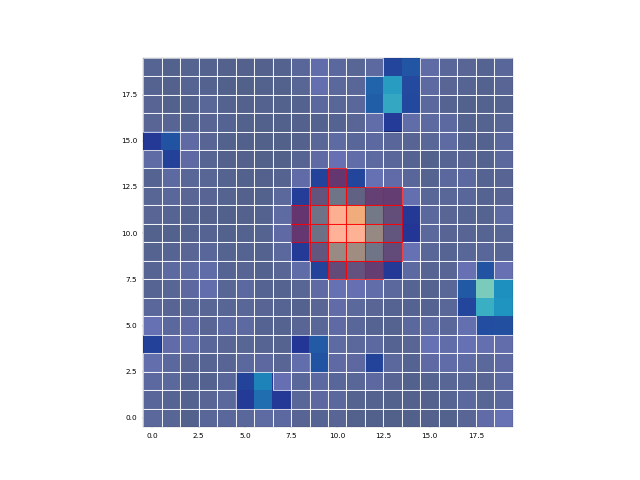

In [33]:
fig, ax = plt.subplots()

# Image
im = ax.imshow(np.log10(median_image), origin='lower', cmap = plt.cm.YlGnBu_r)

# Background mask
tu.plots.overplot_mask(ax,background_mask,ec='w',lw=0.1, fc='w', alpha=0.3)
tu.plots.overplot_mask(ax,background_mask,ec='w',lw=0.5, fc='none', alpha=1.0)

# Aperture mask
tu.plots.overplot_mask(ax,aperture_mask,ec='r',lw=0.1, fc='r', alpha=0.3)
tu.plots.overplot_mask(ax,aperture_mask,ec='r',lw=0.5, fc='none', alpha=1.0)

#### Check neighbouring stars

Read results

In [34]:
# TPF's median cadence image
median_image = info.median_image

# Magnitudes of target and neighbouring stars
neighbouring_stars_TESSmag = info.neighbours_used.mag
target_star_TESSmag = info.target.mag

# Pixel location of target and neighbouring stars
target_star_coord_pix = info.target.pix
neighbouring_stars_coord_pix = info.neighbours_used.pix

Plot results

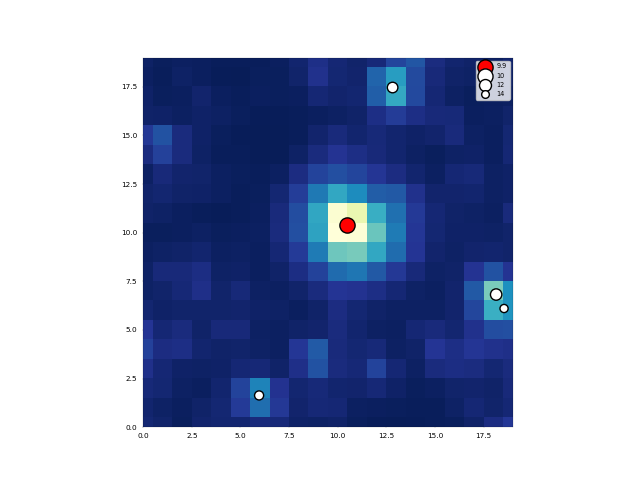

In [35]:
reference_TESSmag = [10, 12, 14]
TESSmags = np.r_[neighbouring_stars_TESSmag, target_star_TESSmag, reference_TESSmag]

fig, ax = plt.subplots()

# Image
im = ax.imshow(np.log10(median_image), origin='lower', cmap = plt.cm.YlGnBu_r)

# Plot target and neighbouring stars
im = ax.imshow(np.log10(median_image), origin='lower', cmap = plt.cm.YlGnBu_r)
sizes = tu.plots.scalesymbols(target_star_TESSmag, np.amin(TESSmags), np.amax(TESSmags))
ax.scatter(target_star_coord_pix[:,0], target_star_coord_pix[:,1], s=sizes, c='r', edgecolors='k', linewidth=1, label=f'{target_star_TESSmag:.1f}')
if neighbouring_stars_coord_pix.size > 0:
    sizes = tu.plots.scalesymbols(neighbouring_stars_TESSmag, np.amin(TESSmags), np.amax(TESSmags))
    ax.scatter(neighbouring_stars_coord_pix[:,0], neighbouring_stars_coord_pix[:,1], s=sizes, c='w', edgecolors='k', linewidth=1)

# Plot legend
if neighbouring_stars_coord_pix.size > 0:
    for size in reference_TESSmag:
        sizes = tu.plots.scalesymbols(size*np.ones(1),np.amin(TESSmags), np.amax(TESSmags))
        ax.scatter(-1, -1, s=sizes, c='w', edgecolors='k', linewidth=1, label=f'{size}')
ax.set_xlim(0,median_image.shape[0]-1)
ax.set_ylim(0,median_image.shape[1]-1)
ax.legend(loc='best')

#### Check the flux contamination in the aperture mask

Read results

In [36]:
median_image = info.median_image # TPF's median cadence image
fit_image = info.fit.fitted_image # Fitted image

Assess the quality of the fit visually

In [37]:
image_quality = np.abs(median_image - fit_image)/median_image

Plot results

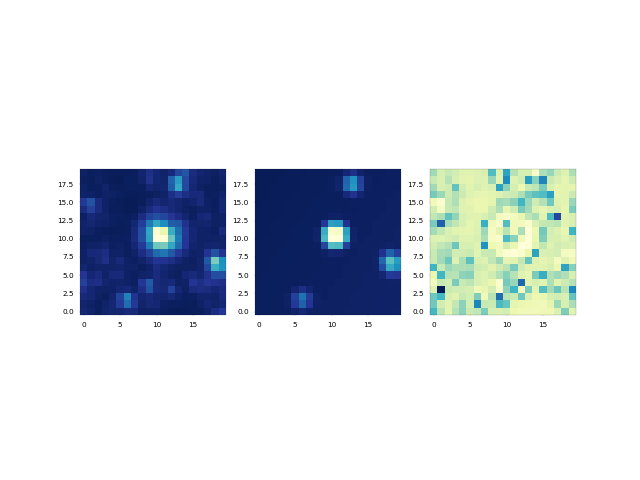

In [38]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

# Images
ax1.imshow(np.log10(median_image), origin='lower', cmap = plt.cm.YlGnBu_r)
ax2.imshow(np.log10(fit_image), origin='lower', cmap = plt.cm.YlGnBu_r)
ax3.imshow(np.log10(image_quality), origin='lower', cmap = plt.cm.YlGnBu_r)

Separate flux components into:
1. Target star
2. Neighbouring stars
3. Background

In [39]:
# Read fit functions
TargetStar = info.fit.TargetStar
Plane = info.fit.Plane

# Generate grid
(xsize,ysize) = median_image.shape
y, x = np.mgrid[:xsize, :ysize]

# Compute images
image_TargetStar = TargetStar(x,y)
image_Background = Plane(x,y)
image_Neighbours = fit_image-image_TargetStar-image_Background

Plot components

/var/folders/pv/4lz7c47j4d901p0hrt6r1s500000gn/T/ipykernel_60435/2083137824.py:5: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(image_Neighbours), origin='lower', cmap = plt.cm.YlGnBu_r)
/var/folders/pv/4lz7c47j4d901p0hrt6r1s500000gn/T/ipykernel_60435/2083137824.py:5: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(image_Neighbours), origin='lower', cmap = plt.cm.YlGnBu_r)


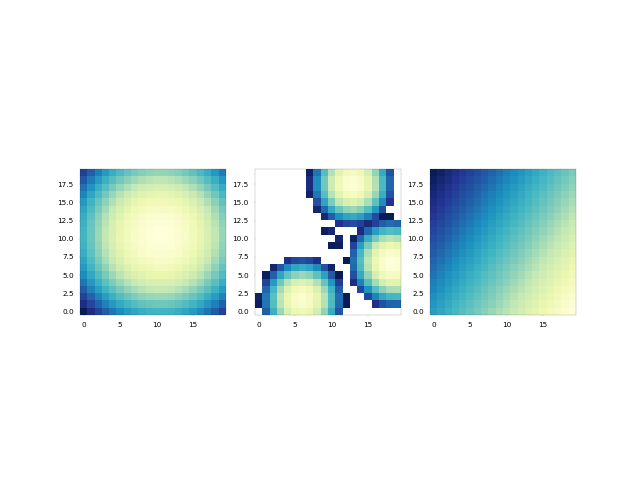

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

# Images
ax1.imshow(np.log10(image_TargetStar), origin='lower', cmap = plt.cm.YlGnBu_r)
ax2.imshow(np.log10(image_Neighbours), origin='lower', cmap = plt.cm.YlGnBu_r)
ax3.imshow(np.log10(image_Background), origin='lower', cmap = plt.cm.YlGnBu_r)

Assess the quality of the fit quantitatively

In [41]:
# Aperture mask based on the median image
aperture_mask  = info.masks.aperture

targetStar_flux = image_TargetStar[aperture_mask].sum()
neighbours_flux = image_Neighbours[aperture_mask].sum()

print(f'Neighbour-target flux ratio: {100*neighbours_flux/targetStar_flux} %')

Neighbour-target flux ratio: 1.6428486701971233e-12 %


The fraction above can be directly accessed as

In [42]:
value = info.fit.fraction_contamination_ap
print(f'Neighbour-target flux ratio: {100*value} %')

Neighbour-target flux ratio: 1.642848670197123e-12 %


#### Chech the Principal Component Analysis (PCA)

> A more in-depth tutorial about how to used PCA to detrend a light curve can be found in the [LightKurve website][1] (on which this tutorial, and also this part of the code, is based).

[1]: https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-removing-scattered-light-using-regressioncorrector.html

Read results

In [43]:
# Raw light curve
lc_sap = info.lc_raw2

# Light curve time array of the regressed light curve
time = info.lc_regressed.lc.time.value

# Regresor light curve obtained from the principal component analysis on the pixels defined by the background mask. 
lc_trend = info.lc_trend

# Number of Principal Components (PCs) used in the PCA
npc_all = info.pca_all.npc 
npc_used = info.pca_used.npc

# Principal components (PCs)
pc_used = info.pca_used.pc[:-1] 
pc_all = info.pca_all.pc[:-1]

# Coeficients of each PC used to detrend the light curve
pc_used_coef = info.pca_used.coef

Plot **in black** the light curve obtained from the Simple Aperture Photometry (SAP).

Plot **in red** the regresor light curve obtained from the principal component analysis on the pixels defined by the background mask. 

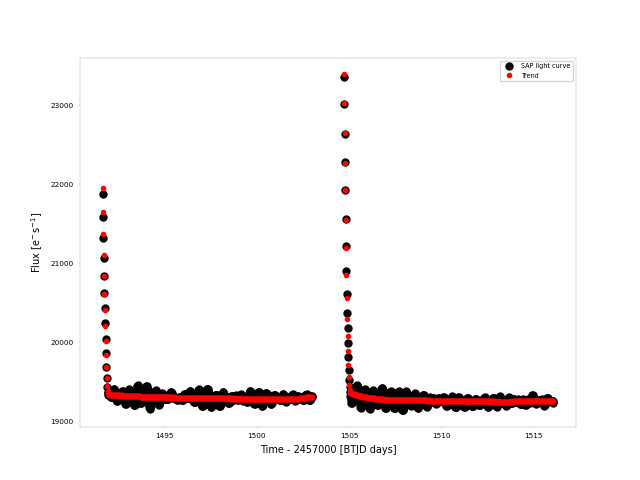

In [45]:
fig, ax = plt.subplots()
lc_sap.plot(ax=ax, color='k', marker='o', ms=5, ls='None', label='SAP light curve')
lc_trend.plot(ax=ax, color='r', marker='o', ms=3, ls='None', label='Trend')
plt.legend(loc='best')

**Reproduce the trend** (red curve in the plot above) using the Principal Components (PCs) and its coeficients.

In [46]:
# Generate a constant PC of the same lenght as the other PCs.
pc_constant = np.repeat(1, pc_used[0].size)

# Add the constant PC to the list of used PCs
pc_used_and_constant = [*pc_used,pc_constant]

# Reproduce the trend
iterator = zip(pc_used_coef, pc_used_and_constant)
lc_trend_reproduced = np.sum([coef*lc for coef,lc in iterator], axis=0)

Plot the reproduced trend

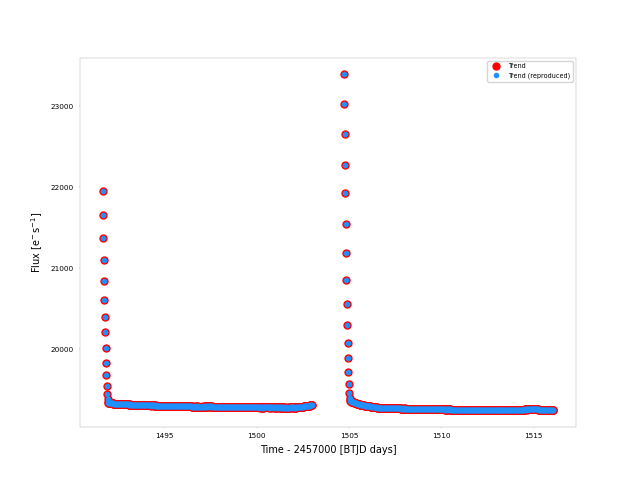

In [48]:
fig, ax = plt.subplots()
lc_trend.plot(ax=ax, color='r', marker='o', ms=5, ls='None', label='Trend')
ax.plot(lc_trend.time.value, lc_trend_reproduced, color='dodgerblue', marker='o', ms=3, ls='None', label='Trend (reproduced)')
plt.legend(loc='best')

Plot each Principal Component (PC) in increasing order starting from the bottom. **Note that the ones in black are not used for the detrending process.**

Text(0.5, 0, 'BJD - 2457000')

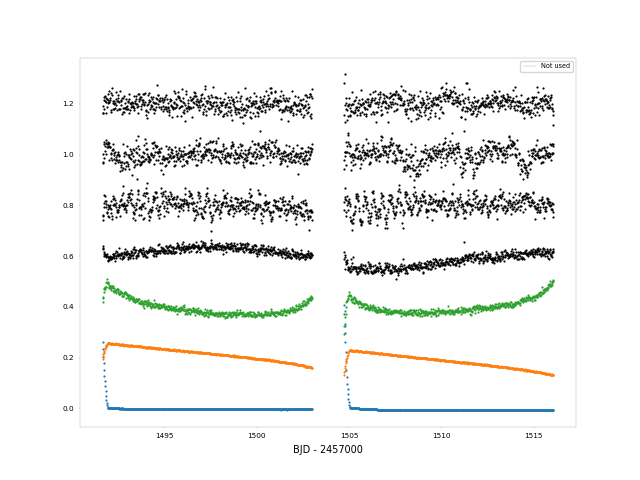

In [49]:
fig, ax = plt.subplots()

# PCs used to detrend the light curve
for i,pc in enumerate(pc_used):
    offset = i*0.2
    ax.scatter(lc_trend.time.value,pc+offset, marker='.', s=10, linewidths=0)

# PCs not used to detrend the light curve    
for pc in pc_all[npc_used:]:
    i+=1
    offset = i*0.2
    ax.scatter(lc_trend.time.value,pc+offset, marker='.', color='k', s=10, linewidths=0)

# Legend
if len(pc_all[npc_used:]) > 0:
    lines = [Line2D([0], [0], color='k')]
    labels = ['Not used']
    ax.legend(lines, labels, loc='best')    

ax.set_xlabel('BJD - 2457000')

##### **Number of Principal components (PCs)**

The number of PCs used to detrend de raw light curve is based on the median of the 'local' variances of the PCs. Specifically, each PC is partitioned (choped) into smaller pices of equal length and the variance of each piece is calculed ('local'variance). The median of those veriances is the number that decides whether or not the PC is used to detrend te light curve.

The are 3 parameters in `extract_light_curve` that control this process. The documentation for them is quoted below

```
- max_num_of_pc (int, optional): 
      Maximum number of principal components to use. Defaults to 7.

- num_of_pc_bins (int, optional):
      Number of bins used to chop the principal components in smaller
      light curves of equal lenght. These smaller light curves will be
      used to find the level of scatter (variance) in the light curve.
      Defaults to 40.
        
- pc_threshold_variance (float, optional):
      Threshold variance to use to find the number of principal
      components. Principal components with variance above this threshold
      are not considered. Defaults to 1e-4.
```

The default number of maximum PCs to use (`max_num_of_pc`) and the threshold that sets the maximun variance (`pc_threshold_variance`) **are optimized to work with stars from the first cycle of TESS (sectors 1 to 13) in the southern continous viewing zone (S-CVZ).** Those two parameters were obtained from the figure below which was generated using ~2000 corrected light curves from the first TESS in the S-CVZ.

In the figure, each abscissa shows 13 box plots, one per TESS sector. Each box plot comes from the distribution of the medians of the 'local' variances of the PCs. The figure shows that the higher PC, the higher the abscissa, which is expected because the strong and well-defined systematics will be picked by the first PCs while the later PCs will pick mostly on white noise. Nevertheless, the abscissa value saturates and allow us to define a cut value of `pc_threshold_variance = 1e-4` to reject the late PCs that pick on white noise and leave then only the PCs that pick on the well-defined systematics.

The choice of `pc_threshold_variance = 1e-4` also tells us (from the figure) that 7 PCs will cover most of the cases when detrending a  light curves from the first cycle of TESS in the S-CVZ (`max_num_of_pc = 7`).

**Note that the abscissa in the figure is demensionless because the PCs are normalized.** See further details in the [reference paper](https://doi.org/10.1051/0004-6361/202141926): https://doi.org/10.1051/0004-6361/202141926


![Box plot](figures/boxplot.png)

We can confirm that the plot showing the used (colorful ones) and unused (black ones) PCs follows the thresholds defined above, i.e., that only the PCs whose median of 'local' variances are lower that 1-e4 are used to detrend the light curve.

In [50]:
import pandas as pd
num_of_pc_bins = 40
pc_threshold_variance = 1e-4
for i,pc in enumerate(pc_all):
    val = pd.Series(pc).rolling(num_of_pc_bins).var().median()
    print(f'Median of the "local" variances of the PC {i} = {val} < {pc_threshold_variance} -> {val<pc_threshold_variance}')

Median of the "local" variances of the PC 0 = 2.2854004217538e-08 < 0.0001 -> True
Median of the "local" variances of the PC 1 = 4.885855013256824e-06 < 0.0001 -> True
Median of the "local" variances of the PC 2 = 5.221129239338863e-05 < 0.0001 -> True
Median of the "local" variances of the PC 3 = 0.0001151045351848299 < 0.0001 -> False
Median of the "local" variances of the PC 4 = 0.0006944402053209079 < 0.0001 -> False
Median of the "local" variances of the PC 5 = 0.0006581899197267508 < 0.0001 -> False
Median of the "local" variances of the PC 6 = 0.0006541459987410116 < 0.0001 -> False


<mark>If you plan to use Tessutils to corret a large catalog outside the first cycle of TESS in the S-CVZ, you should reproduce the figure above to obtain new values for the parameters `pc_threshold_variance = 1e-4` and `max_num_of_pc = 7` that apply to your catalog in question.</mark>

In fact, if you have already used the function `plot_diagnosis` within this tutorial to generate a PDF showing the corrected light curves of TIC 374944608 for all its sectors available, then you will notice that the light curves after sector 13 (end of TESS cycle 1) have more white noise compared to the light curves before sector 13 (TESS cycle 1). The difference is in part due to the use of the default values for the parameters `pc_threshold_variance = 1e-4` and `max_num_of_pc = 7`, which were tailored to stars in the S-CVZ of TESS cycle 1. I presume that TESS cycle 3 improved on precision and therefore the light curves that it delivers have a lower level of white noise, meaning that the parameter `pc_threshold_variance` in Tessutils should actually be lower than its default value.

#### Check available light curves

Read results

In [51]:
# Raw light curve, without excluded intervals, generated using simple aperture potometry with the aperture mask.
lc_raw1 = info.lc_raw1

# Raw light curve, with excluded intervals, generated using simple aperture potometry with the aperture mask.
lc_raw2 = info.lc_raw2

# Regresor light curve obtained from the principal component analysis. Used for the linear regression of `lc_raw2`.
lc_trend = info.lc_trend

# Light curve after the linear regression. I.e., light curve with systematics corrected.
lc_regressed = info.lc_regressed.lc

# Regressed light curve with flux outliers removed by sigma clipping
lc_regressed_clean = info.lc_regressed_clean

Plot results

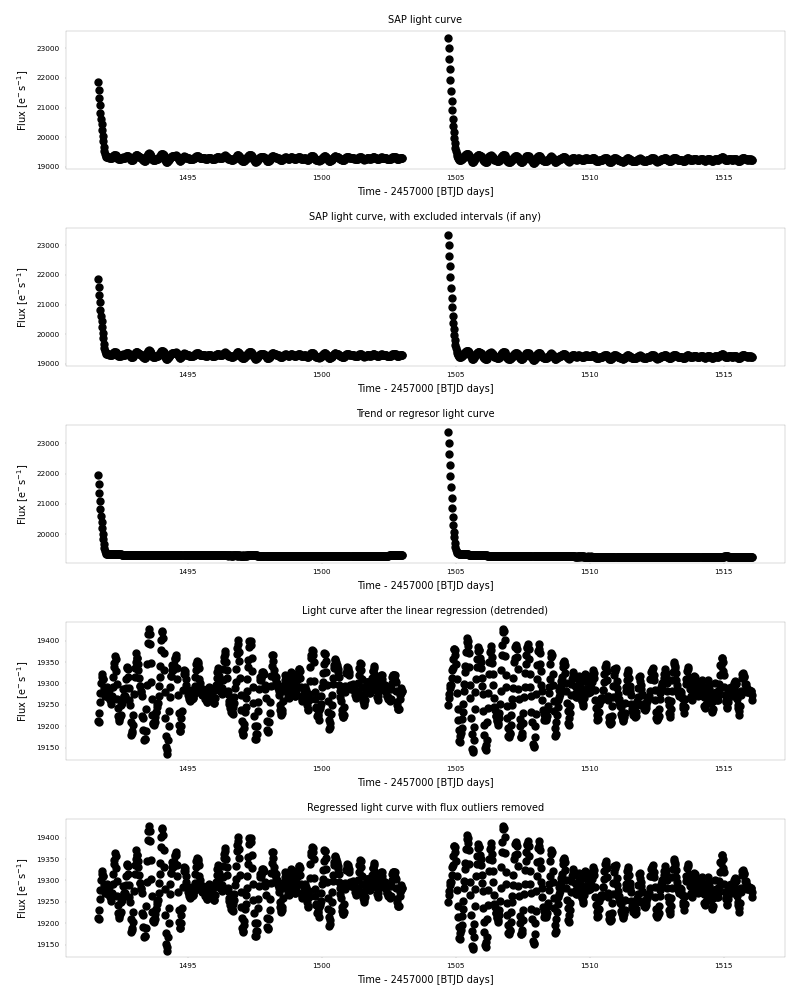

In [52]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(8,10))

ax1.set_title('SAP light curve')
lc_raw1.plot(ax=ax1, color='k', marker='o', ms=5, ls='None', label='')

ax2.set_title('SAP light curve, with excluded intervals (if any)')
lc_raw2.plot(ax=ax2, color='k', marker='o', ms=5, ls='None', label='')

ax3.set_title('Trend or regresor light curve')
lc_trend.plot(ax=ax3, color='k', marker='o', ms=5, ls='None', label='')

ax4.set_title('Light curve after the linear regression (detrended)')
lc_regressed.plot(ax=ax4, color='k', marker='o', ms=5, ls='None', label='')

ax5.set_title('Regressed light curve with flux outliers removed')
lc_regressed_clean.plot(ax=ax5, color='k', marker='o', ms=5, ls='None', label='')
plt.tight_layout()

Get the normalized light curve in ppt

In [53]:
lc_normalized = tu.reduction.normalize_lightCurve(lc_regressed_clean)

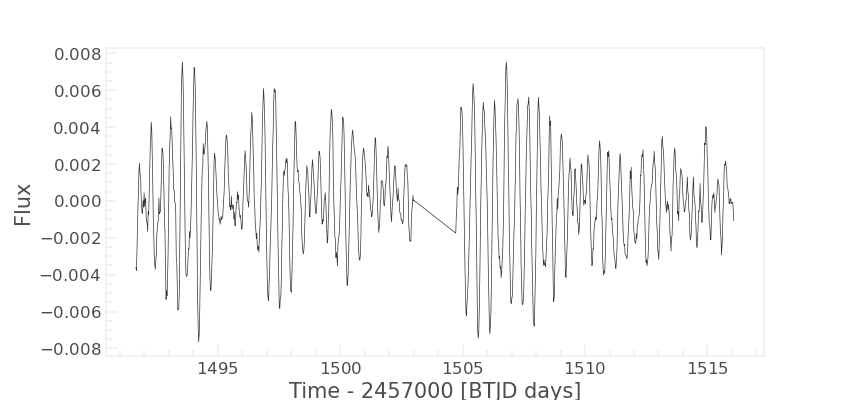

In [55]:
_ = lc_normalized.plot()

See the under-the-hood of the normalization function

In [56]:
import inspect
code = inspect.getsource(tu.reduction.normalize_lightCurve)
print(code)

def normalize_lightCurve(lc):
    '''Function applied to light curves of individual TESS sectors before stitching them'''
    median = np.median(lc.flux)
    return (lc-median)/median



We can also take a look to the location of the TPF's centroid over the cadences (time).

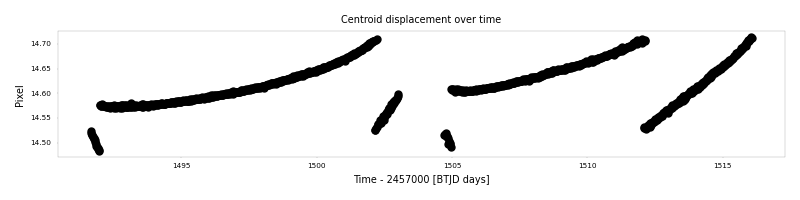

In [57]:
centroids = info.centroids
fig, ax = plt.subplots(figsize=(8,2))
ax.plot(centroids.time, centroids.sqrt_col2_row2, color='k', marker='o', ms=5, ls='None', label='')
ax.set_title('Centroid displacement over time')
ax.set_ylabel('Pixel')
ax.set_xlabel('Time - 2457000 [BTJD days]')
plt.tight_layout()

### Generate a summary table characterizing the light curve extraction

It is useful when working with large catalogs to have a CSV table with information, like the size of the aperture mask, for every TPF processed. The function `get_group_summary()`creates such a table for all files within the output directory of the function `group_lcs()`.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

directory = 'groupped'
tu.reduction.get_group_summary(directory, overwrite=True)

Reading: tic374944608_allsectors_corrected.pickle.


The default CSV file generated is `summary.csv` and has the following columns, which I quoted from the documentation:
1. `tic`: TIC number.
2. `sector`: Sector number.
3. `ra`: Right ascension.
4. `dec`: Declination.
5. `flux_contamination_fraction`: Fraction of flux contamination in the aperture mask.
6. `background_change_fraction`: Fraction of flux background change.
7. `mag`: TESS magnitude.
8. `number_of_pc_used`: Number of principal components used for the correction of the light curve.
9. `aperture_mask_threshold`: Threshold used to create the aperture mask.
10. `aperture_mask_size`: Number of pixels in the aperture mask.
11. `background_mask_size`: Number of pixels in the background mask.
12. `tag`: Message about the light curve extraction.
13. `time_span`: Time span of the light curve in days.
14. `time_points`: Number of time points (cadences) in the light curve.

The CSV file can be explored, for example, with the Pandas module. 

In [59]:
df = pd.read_csv('summary.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tic                          35 non-null     int64  
 1   sector                       35 non-null     int64  
 2   ra                           35 non-null     float64
 3   dec                          35 non-null     float64
 4   flux_contamination_fraction  34 non-null     float64
 5   background_change_fraction   34 non-null     float64
 6   mag                          34 non-null     float64
 7   number_of_pc_used            34 non-null     float64
 8   aperture_mask_threshold      35 non-null     int64  
 9   aperture_mask_size           35 non-null     int64  
 10  background_mask_size         35 non-null     int64  
 11  tag                          35 non-null     object 
 12  time_span                    34 non-null     float64
 13  time_points           

In [61]:
df.head()

,tic,sector,ra,dec,flux_contamination_fraction,background_change_fraction,mag,number_of_pc_used,aperture_mask_threshold,aperture_mask_size,background_mask_size,tag,time_span,time_points
0,374944608,1,89.447059,-62.08267,1.292664e-13,0.366016,9.9022,7.0,5,28,334,OK,27.833622,1267.0
1,374944608,2,89.447059,-62.08267,1.163130e-11,0.142962,9.9022,4.0,5,25,339,OK,27.354455,1196.0
2,374944608,3,89.447059,-62.08267,6.897757e-17,0.174480,9.9022,5.0,5,26,328,OK,27.312781,1077.0
3,374944608,4,89.447059,-62.08267,1.470450e-12,0.104333,9.9022,7.0,5,25,335,OK,25.896102,1027.0
4,374944608,5,89.447059,-62.08267,1.535219e-15,0.068774,9.9022,6.0,5,25,339,OK,26.146106,1176.0


Text(0.5, 1.0, 'Aperture mask')

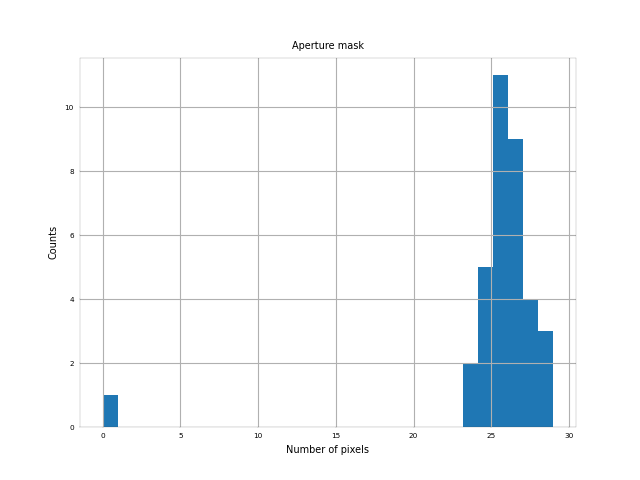

In [62]:
fig, ax = plt.subplots()
df.aperture_mask_size.hist(ax=ax, bins=30)
ax.set_ylabel('Counts')
ax.set_xlabel('Number of pixels')
ax.set_title('Aperture mask')

Because a single TIC star has multiple TESS sectors, the star willl hace multiple values for many of the extraction parameters. A good way to deal collapse them into a single value is to group the values in the CSV file by their TIC number and then apply a function to those groups. An example is shown below 

In [63]:
columns = ['aperture_mask_size',
           'background_mask_size',
           'aperture_mask_threshold',
           'number_of_pc_used',
           'background_change_fraction',
           'flux_contamination_fraction',
           'time_span',
           'time_points']

df.groupby('tic').median()[columns]

,aperture_mask_size,background_mask_size,aperture_mask_threshold,number_of_pc_used,background_change_fraction,flux_contamination_fraction,time_span,time_points
tic,,,,,,,,
374944608,26.0,334.0,5.0,6.0,0.123855,8.216470e-16,26.163467,3455.0


We could now define quality cuts in our large catalog. For example, remove all TIC stars with aperture mask with less than 4 pixels, remove all TIC stars with a flux contamination larger that certain value based on its distribution, etc.

**If the folder given as input to `get_group_summary` contains files with different TIC stars each, then the function will read them separately and append all the information to a single CSV.**

### Exclude time intervals from the light curve extraction 

Some time intervals are particularly challenging to correct. You can directly remove those intervals during the light curve extraction by using the optional argument `excluded_intervals` of the function `extract_light_curve`. The documentation of such an optional argument quoted below. **Note that intervals must have units.**  

````
excluded_intervals (dict):
    Dictionary indicating the intervals to exclude. The keys are
    integers indicating the TESS sectors, and the values are lists of
    tuples, each tuple containing an initial and final time to exclude.
    Times must be given with astropy units.
    Example: dictionary to set to FALSE the quality mask in TESS sectors
    1 and 6 for the given intervals.
        > import astropy.units as u
        > intervals = {}
        > intervals[1] = [ (1334.8, 1335.1)*u.day,
                           (1347.0, 1349.5)*u.day ]
        > intervals[6] = [ (1476.0, 1479.0)*u.day ]
````

The example below follows the [reference paper](https://doi.org/10.1051/0004-6361/202141926) and removes intervals from TESS sectors 1 to 8. Results form the example below will be stored in a folder with suffix '_excludedIntervals' so that they can be compared to the previous ones from this tutorial.

In [64]:
import astropy.units as u

excluded_intervals = {} # Initialize the dictionary

excluded_intervals[1] = [ (1334.8, 1335.1)*u.day,
                          (1347.0, 1349.5)*u.day ]

excluded_intervals[2] = [ (1356.2, 1356.5)*u.day,
                          (1361.0, 1361.3)*u.day,
                          (1363.5, 1363.8)*u.day,
                          (1365.9, 1366.2)*u.day,
                          (1373.8, 1374.1)*u.day,
                          (1375.8, 1376.0)*u.day,
                          (1377.9, 1378.7)*u.day ]

excluded_intervals[3] = [ (1380.0, 1385.0)*u.day,
                          (1387.6, 1387.9)*u.day,
                          (1390.1, 1390.4)*u.day,
                          (1392.6, 1392.9)*u.day,
                          (1395.1, 1395.4)*u.day,
                          (1398.6, 1398.9)*u.day,
                          (1400.6, 1400.9)*u.day,
                          (1402.6, 1402.9)*u.day,
                          (1404.6, 1404.9)*u.day,
                          (1406.1, 1406.4)*u.day ]
excluded_intervals[4] = [ (1420.0, 1427.0)*u.day ]

excluded_intervals[5] = [ (1463.0, 1465.0)*u.day ]

excluded_intervals[6] = [ (1476.0, 1479.0)*u.day ]

excluded_intervals[7] = [ (1502.5, 1506.0)*u.day ]

excluded_intervals[8] = [ (1529.5, 1533.0)*u.day ]

In [65]:
TIC = 374944608

Perform the light curve extraction only for the TESS sectors from 1 to 8

In [66]:
from pathlib import Path
TPF_files = [str(file) for file in Path('tpfs').glob(f'tic{TIC}_sec[1-8].fits')]
tu.reduction.extract_light_curve(TPF_files, excluded_intervals=excluded_intervals, outputdir='processed_excludedIntervals')

Group the results

In [68]:
inputdir='processed_excludedIntervals'
tu.reduction.group_lcs(inputdir, TICs=TIC, outputdir='groupped_excludedIntervals')

Generate the diagnostic PDF file. Excluded intervals are indicated with a yellow background.

In [69]:
group_file = f'groupped_excludedIntervals/tic{TIC}_allsectors_corrected.pickle'
tu.plots.plot_diagnosis(group_file, pdfname='diagnostic_plot_TIC{TIC}_excludedIntervals.pdf')
print('Done.')

Reading: tic374944608_allsectors_corrected.pickle
Ploting TIC 374944608, sector 1.
Ploting TIC 374944608, sector 2.
Ploting TIC 374944608, sector 3.
Ploting TIC 374944608, sector 4.
Ploting TIC 374944608, sector 5.
Ploting TIC 374944608, sector 6.
Ploting TIC 374944608, sector 7.
Ploting TIC 374944608, sector 8.
Generating plot of stitched light curve and periodogram.
Saving PDF as diagnostic_plot_TIC{TIC}_excludedIntervals.pdf.
Done.
